### This code illustrates using GradCAM for model explainability.

In [1]:
import cv2
import numpy as np
from torchvision import models

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, deprocess_image, preprocess_image

/home/debonair/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
#Load pretrained model.
model = models.resnet50(pretrained = True)

#Set to eval mode.
model.eval()

/home/debonair/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/debonair/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
image_path = '../../inputs/misc/both.png'
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = np.float32(img) / 255
input_tensor = preprocess_image(img, 
                                mean = [0.485, 0.456, 0.406], 
                                std=[0.229, 0.224, 0.225])


In [7]:
from PIL import Image

In [12]:
#The targets in the image are a dog and a cat. 
#Labelmap for cat and french bulldog in imagenet dataset are 282 and 246.

def visualize_gradcam(image_pt, targets):
    targets = [ClassifierOutputTarget(targets)]
    target_layers = [model.layer4]
    with GradCAM(model = model, target_layers=target_layers) as cam:
        grayscale_cams = cam(input_tensor=input_tensor, targets = targets)
        cam_image = show_cam_on_image(img, grayscale_cams[0, :], use_rgb = True)

    cam = np.uint8(255 * grayscale_cams[0, :])
    cam = cv2.merge([cam, cam, cam])
    images = np.hstack((
        np.uint8(255 * img),
        cam, 
        cam_image
    ))
    return Image.fromarray(images)

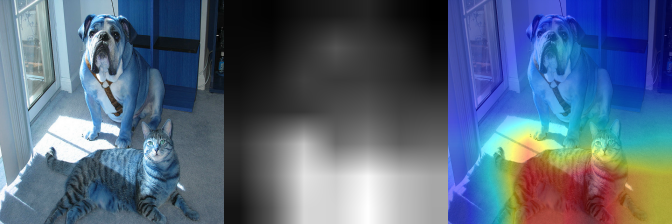

In [13]:
visualize_gradcam(image_pt=input_tensor, targets = 282)

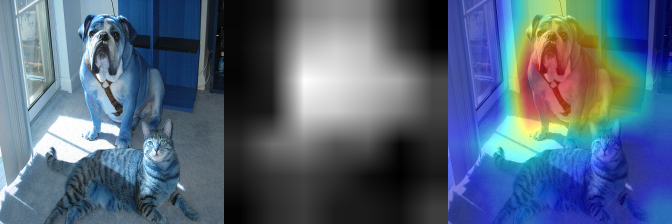

In [14]:
visualize_gradcam(image_pt=input_tensor, targets = 246)